In [1]:
import numpy as np
import pandas as pd
import pylab
from obj_function import energy_objective, uccsd_singlet_paramsize

C:\Users\hp\Documents\Github\CircuitNotebooks\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(Note: This is the (slow) Python simulator.)


In [2]:
def generate_input_amps():
    original_electrons = 16
    n_electrons = 2
    n_orbitals = 2

    occupied_indices = range(8 - n_electrons // 2)
    active_indices = range(8 - n_electrons // 2, 8 - n_electrons // 2 + n_orbitals)
    active_electrons = original_electrons - len(occupied_indices) * 2
    active_qubits = len(active_indices) * 2
    
    name = "C:/Users/hp/Documents/GitHub/Circuit_Notebooks/imfil/1.57rad_init_amp.txt"
    
    results = []
        
    for i in range(30):
        n_amplitudes = int(uccsd_singlet_paramsize(active_qubits, active_electrons))
        current_amplitudes = [0.0] * n_amplitudes + .002 * np.random.randn(n_amplitudes)
        current_amplitudes = current_amplitudes / np.linalg.norm(current_amplitudes)
        results.append(current_amplitudes)
        
    print(results)
        
    with open(name, 'wb') as f:
        np.savetxt(f, results)
        
generate_input_amps()

[array([ 0.67431321, -0.73844546]), array([ 0.46308507, -0.88631384]), array([-0.0441946 ,  0.99902294]), array([0.94928186, 0.31442639]), array([ 0.99446018, -0.10511395]), array([0.65224492, 0.75800829]), array([-0.15855886, -0.98734953]), array([-0.80995656, -0.58648987]), array([-0.39147271, -0.92018972]), array([0.04611673, 0.99893606]), array([-0.36990105,  0.92907115]), array([ 0.41686671, -0.90896763]), array([-0.98697632,  0.16086559]), array([-0.70799594,  0.7062165 ]), array([ 0.60216801, -0.7983694 ]), array([-0.49319998,  0.86991596]), array([ 0.95917074, -0.28282766]), array([0.7993136 , 0.60091411]), array([-0.58424902, -0.81157444]), array([-0.60997186, -0.79242308]), array([-0.33138631, -0.94349516]), array([-0.57789075, -0.81611413]), array([0.47595895, 0.8794675 ]), array([0.87182258, 0.4898218 ]), array([-0.45526466, -0.89035616]), array([-0.16293351,  0.98663705]), array([ 0.73583583, -0.67715998]), array([-0.20357467,  0.97905942]), array([ 0.57212859, -0.82016393

In [3]:
def average_distance(y1, y2):
    return sum(np.square(np.subtract(y1, y2)))/len(y1)

def spread_of_result(y):
    return np.std(y)

In [4]:
def display_data(filename):
    df = pd.read_csv(filename)
    print(df.columns)
    initamp1 = df.initamp1
    initamp2 = df.initamp2
    finalamp1 = df.finalamp1
    finalamp2 = df.finalamp2
    finalenergy = df.finalenergy
#     iters = df.iters
    
    print("av_dist:", average_distance(initamp2, finalamp2))
    print("spread:", spread_of_result(finalenergy))

    yi = [[initamp1[i],initamp2[i]] for i in range(len(initamp1))]
    halfpi_init_amplitudes_neg = initamp1
    halfpi_init_amplitudes_pos = initamp2
    halfpi_init_energies = [energy_objective(yi[i]) for i in range(len(yi))]

    yf = [[finalamp1[i],finalamp2[i]] for i in range(len(finalamp1))]
    halfpi_opt_amplitudes_neg = finalamp1
    halfpi_opt_amplitudes_pos = finalamp2

    print(finalenergy)

    fig = pylab.figure(figsize=(20,15))
    pylab.subplot(3,2,1)
#     pylab.xlim([-.00018, .00018])
    pylab.plot(halfpi_init_amplitudes_neg, halfpi_init_energies, 'ro')
    pylab.xlabel("Initial amplitude at angle pi/2")
    pylab.ylabel("Initial energy")
    pylab.title("First amplitude element")

    pylab.subplot(3,2,2)
    pylab.plot(halfpi_init_amplitudes_pos, halfpi_init_energies, 'ro')
    pylab.xlabel("Initial amplitude at angle pi/2")
    pylab.ylabel("Initial energy")
    pylab.title("Second amplitude element")


    fig = pylab.figure(figsize=(20,15))
    pylab.subplot(3,2,1)
#     pylab.xlim([-.00015, .00015])
    # pylab.ylim([-77.935, -77.934])
    pylab.plot(halfpi_opt_amplitudes_neg, finalenergy, 'ro')
    pylab.xlabel("Optimal amplitude at angle pi/2")
    pylab.ylabel("Optimal energy")
    pylab.title("First amplitude element")

    pylab.subplot(3,2,2)
#     pylab.xlim([1.9562, 1.9565])
    # pylab.ylim([-77.935, -77.934])
    pylab.plot(halfpi_opt_amplitudes_pos, finalenergy, 'ro')
    pylab.xlabel("Optimal amplitude at angle pi/2")
    pylab.ylabel("Optimal energy")
    pylab.title("Second amplitude element")

    
    fig = pylab.figure(figsize=(16,12))
    pylab.subplot(3,2,1)
#     pylab.ylim([1.95635, 1.95640])
    pylab.plot(initamp2, finalamp2, 'ro')
    pylab.xlabel("Initial second amplitude at angle pi/2")
    pylab.ylabel("Optimal second amplitude")
    pylab.title("Initial versus final second amplitude")
    
    


    

Index([u'initamp1', u'initamp2', u'finalamp1', u'finalamp2', u'finalenergy',
       u'Unnamed: 5'],
      dtype='object')
('av_dist:', 3.51562499953125)
('spread:', 4.6872166423125617e-07)
0   -77.934300
1   -77.934299
2   -77.934300
3   -77.934300
4   -77.934300
5   -77.934299
6   -77.934300
7   -77.934299
Name: finalenergy, dtype: float64


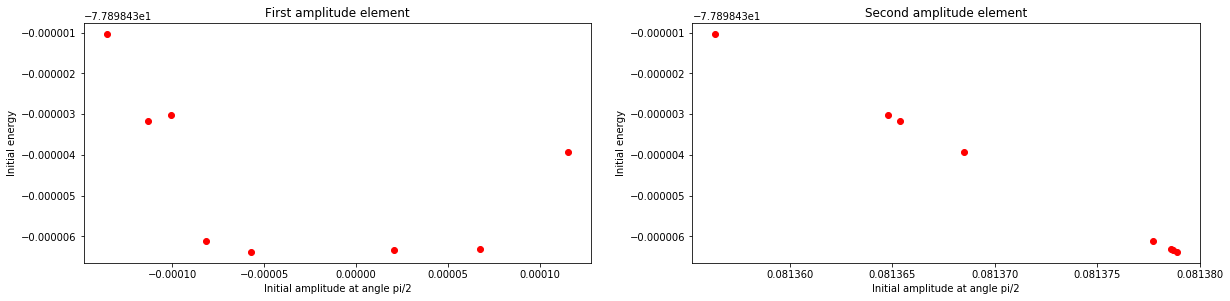

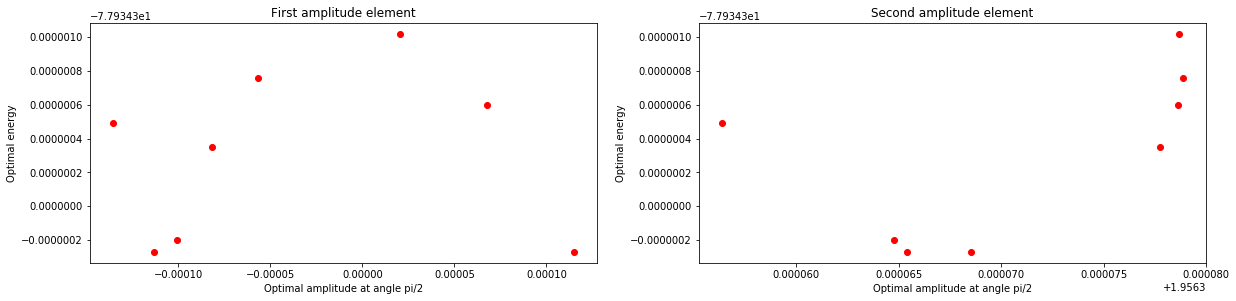

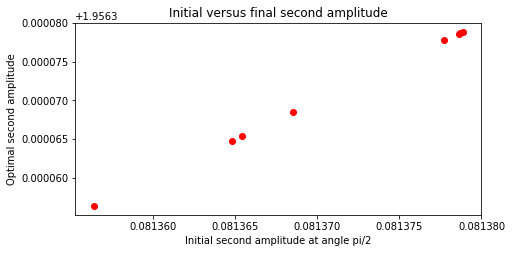

In [5]:
display_data("imfil/imfil_1.57rad_out2_large_noise.csv")

Index([u'initamp1', u'initamp2', u'finalamp1', u'finalamp2', u'finalenergy',
       u'Unnamed: 5'],
      dtype='object')
('av_dist:', 3.5156250040000003)
('spread:', 0.0015794406993480654)
0    -77.931893
1    -77.931927
2    -77.929432
3    -77.931717
4    -77.930677
5    -77.927810
6    -77.928004
7    -77.928303
8    -77.932651
9    -77.931205
10   -77.929937
11   -77.929764
12   -77.930572
13   -77.932591
14   -77.932699
15   -77.928809
16   -77.929699
17   -77.931904
18   -77.930433
19   -77.928659
20   -77.931187
21   -77.928166
22   -77.931395
23   -77.926955
24   -77.929439
25   -77.931060
26   -77.930269
27   -77.930643
28   -77.928305
29   -77.928550
Name: finalenergy, dtype: float64


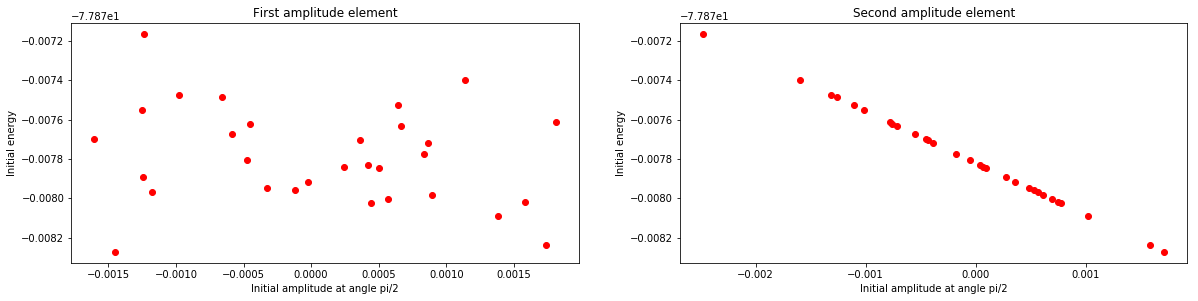

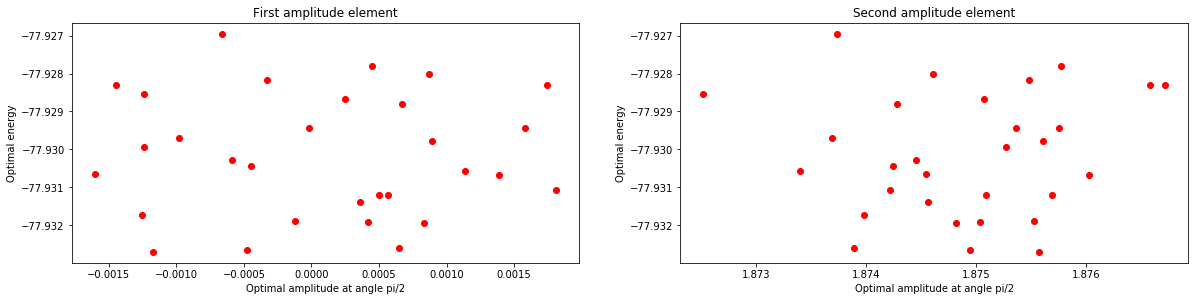

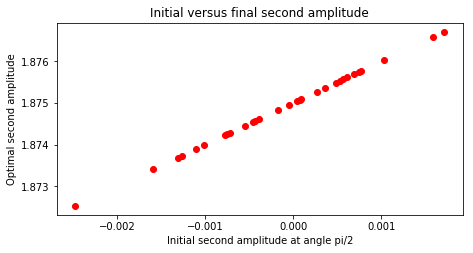

In [6]:
display_data("imfil\imfil_1.57rad_out2_larger_noise.csv")

Index([u'initamp1', u'initamp2', u'finalamp1', u'finalamp2', u'finalenergy',
       u'Unnamed: 5'],
      dtype='object')
('av_dist:', 0.07951356769121452)
('spread:', 0.007605624945732107)
0    -77.931351
1    -77.931365
2    -77.931588
3    -77.931584
4    -77.910488
5    -77.931523
6    -77.928232
7    -77.934674
8    -77.931710
9    -77.931707
10   -77.934298
11   -77.934290
12   -77.932273
13   -77.933046
14   -77.904701
15   -77.931709
16   -77.930937
17   -77.931481
18   -77.910403
19   -77.931676
20   -77.931701
21   -77.931693
22   -77.904794
23   -77.931700
24   -77.931700
25   -77.931712
26   -77.933047
27   -77.934416
28   -77.927588
29   -77.934743
30   -77.933567
31   -77.934539
32   -77.930169
33   -77.931115
34   -77.924973
35   -77.934670
36   -77.932679
37   -77.934130
38   -77.931710
39   -77.931702
40   -77.930078
41   -77.931260
42   -77.930534
43   -77.931606
44   -77.931336
45   -77.931602
46   -77.923424
47   -77.934470
48   -77.931700
49   -77.931697
50   -77.9

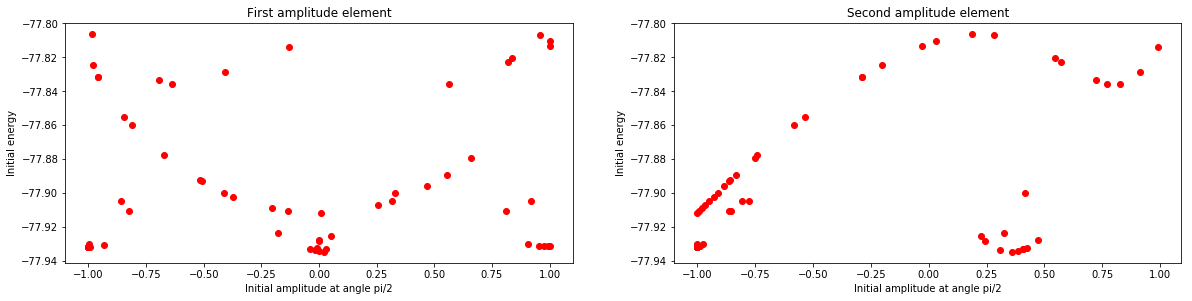

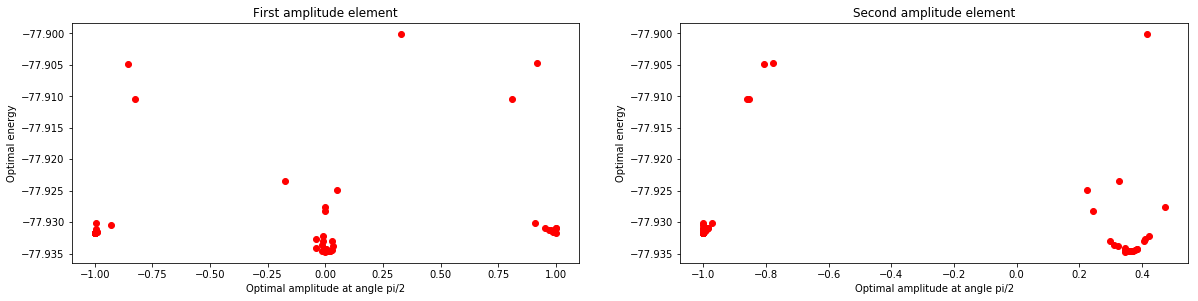

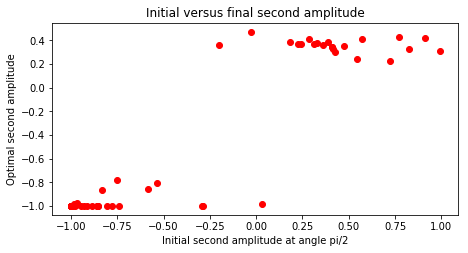

In [7]:
display_data("imfil\imfil_1.57rad_out_5_noise.csv")

Index([u'initamp1', u'initamp2', u'finalamp1', u'finalamp2', u'finalenergy',
       u'Unnamed: 5'],
      dtype='object')
('av_dist:', 0.1392999801696126)
('spread:', 0.00602712490386327)
0    -77.905466
1    -77.931706
2    -77.934170
3    -77.934333
4    -77.931706
5    -77.931706
6    -77.925378
7    -77.933768
8    -77.926257
9    -77.933159
10   -77.931706
11   -77.931706
12   -77.933674
13   -77.934449
14   -77.930820
15   -77.930820
16   -77.931307
17   -77.931307
18   -77.928635
19   -77.934240
20   -77.931706
21   -77.931706
22   -77.930047
23   -77.934043
24   -77.928137
25   -77.934605
26   -77.931706
27   -77.931706
28   -77.913698
29   -77.931514
30   -77.930208
31   -77.931359
32   -77.931585
33   -77.931585
34   -77.930039
35   -77.931223
36   -77.930051
37   -77.931232
38   -77.930753
39   -77.931292
40   -77.910363
41   -77.931634
42   -77.929597
43   -77.934332
44   -77.932634
45   -77.932814
46   -77.927789
47   -77.934669
48   -77.932686
49   -77.932862
50   -77.934

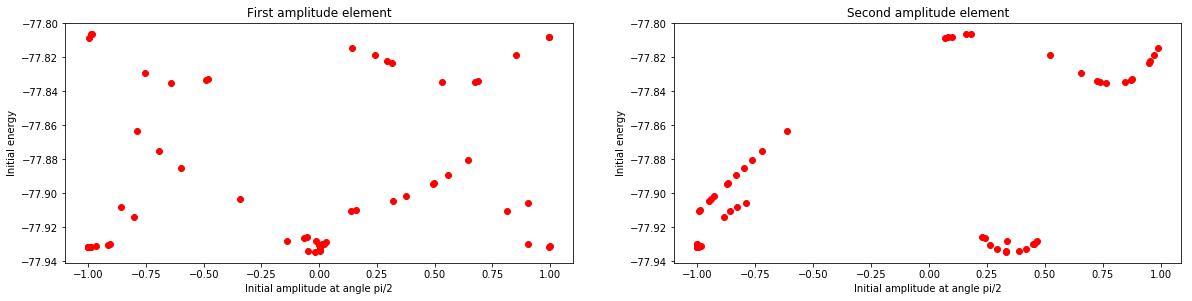

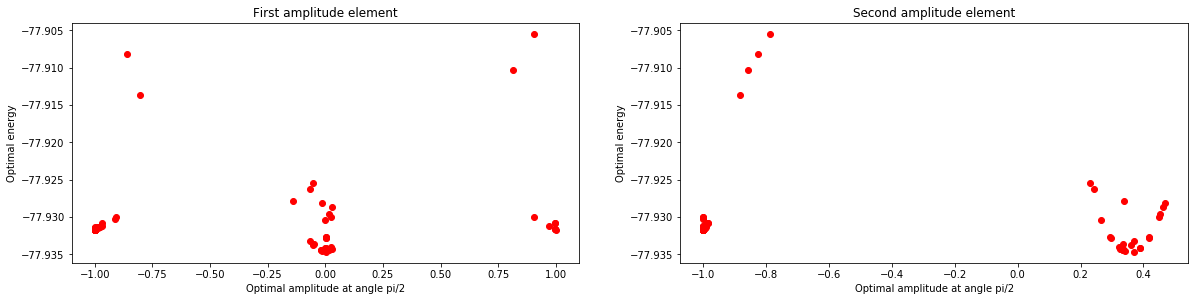

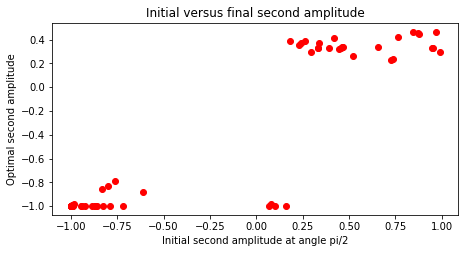

In [8]:
display_data("imfil\imfil_1.57rad_out_7_noise.csv")

Index([u'initamp1', u'initamp2', u'finalamp1', u'finalamp2', u'finalenergy',
       u'Unnamed: 5'],
      dtype='object')
('av_dist:', 32.3155590815081)
('spread:', 0.006239030118701841)
0   -77.931102
1   -77.930305
2   -77.929452
3   -77.927188
4   -77.927964
5   -77.930045
6   -77.911805
7   -77.920360
Name: finalenergy, dtype: float64


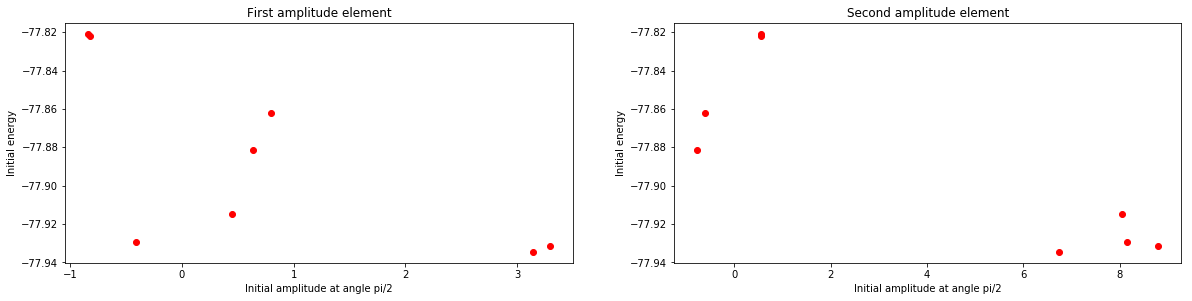

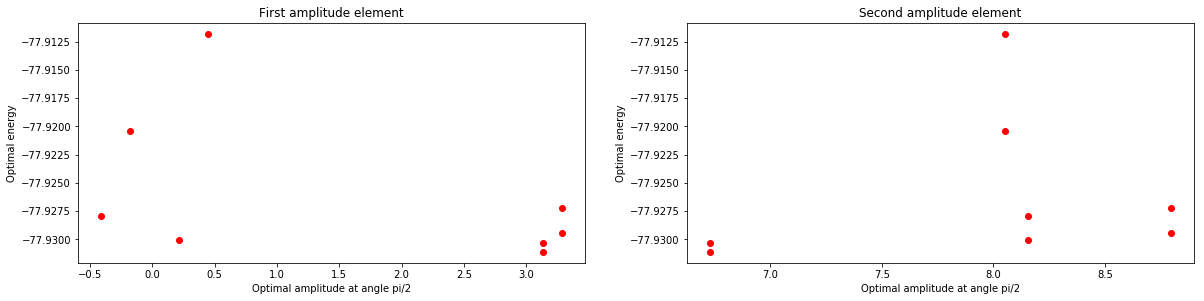

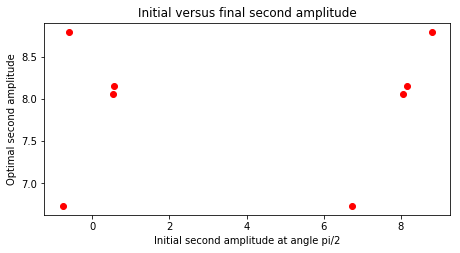

In [18]:
display_data("imfil\imfil_1.57rad_out_3_noise_mod.csv")

Index([u'initamp1', u'initamp2', u'finalamp1', u'finalamp2', u'finalenergy',
       u'Unnamed: 5'],
      dtype='object')
('av_dist:', 0.04916496088138835)
('spread:', 0.0014497003190867151)
0    -77.934684
1    -77.934684
2    -77.934684
3    -77.934684
4    -77.934728
5    -77.934728
6    -77.934728
7    -77.934728
8    -77.931706
9    -77.931706
10   -77.931706
11   -77.931706
12   -77.931706
13   -77.931706
14   -77.931706
15   -77.931706
16   -77.931706
17   -77.931706
18   -77.931706
19   -77.931706
20   -77.933460
21   -77.934599
22   -77.934599
23   -77.934599
24   -77.934468
25   -77.934569
26   -77.934636
27   -77.934636
28   -77.932259
29   -77.934734
30   -77.934734
31   -77.934734
32   -77.931676
33   -77.931676
34   -77.931676
35   -77.931676
Name: finalenergy, dtype: float64


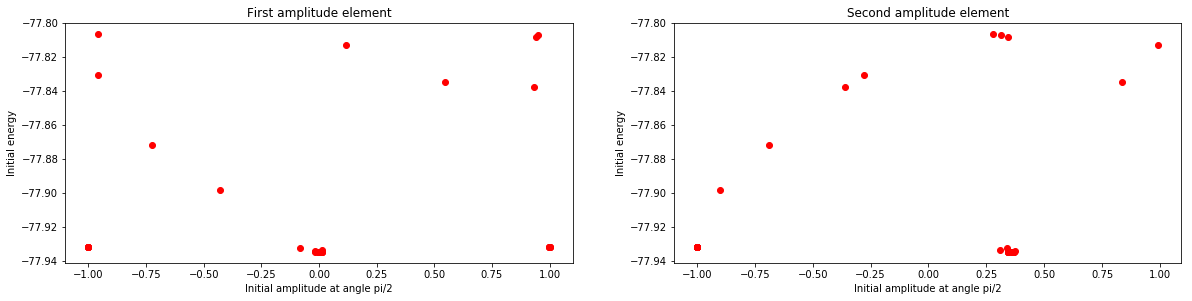

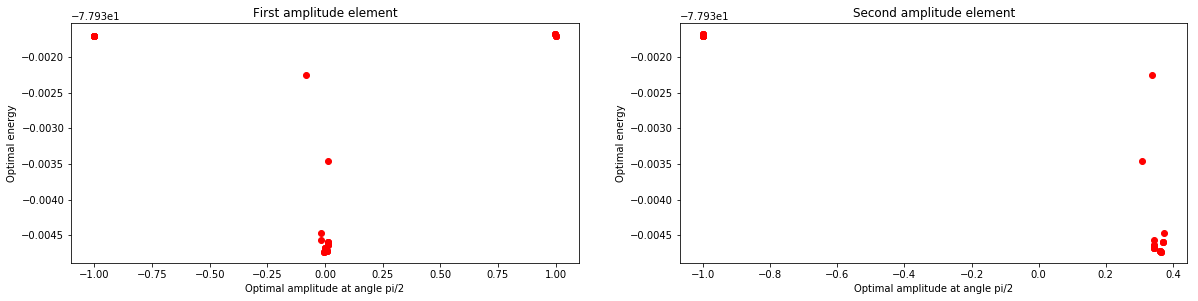

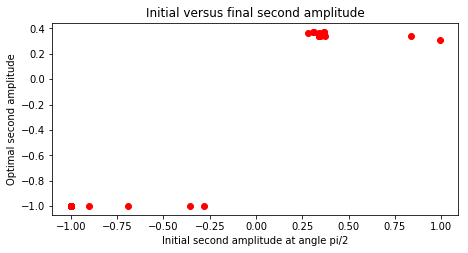

In [10]:
display_data("imfil\imfil_1.57rad_out_9_noise.csv")

Index([u'initamp1', u'initamp2', u'finalamp1', u'finalamp2', u'finalenergy',
       u'Unnamed: 5'],
      dtype='object')
('av_dist:', 0.1391291341489896)
('spread:', 0.006309683476460301)
0    -77.931261
1    -77.931261
2    -77.933040
3    -77.934562
4    -77.933728
5    -77.934523
6    -77.904415
7    -77.931706
8    -77.906085
9    -77.931706
10   -77.928654
11   -77.934620
12   -77.927345
13   -77.934758
14   -77.931706
15   -77.931706
16   -77.924131
17   -77.934468
18   -77.926802
19   -77.934772
20   -77.928824
21   -77.934565
22   -77.928763
23   -77.933542
24   -77.926069
25   -77.932327
26   -77.934673
27   -77.934673
28   -77.931706
29   -77.931706
30   -77.934739
31   -77.934739
32   -77.930981
33   -77.931247
34   -77.930810
35   -77.933988
36   -77.917505
37   -77.934551
38   -77.931625
39   -77.931625
40   -77.927419
41   -77.930042
42   -77.932651
43   -77.934604
44   -77.928781
45   -77.933956
46   -77.933644
47   -77.934624
48   -77.927899
49   -77.934717
50   -77.92

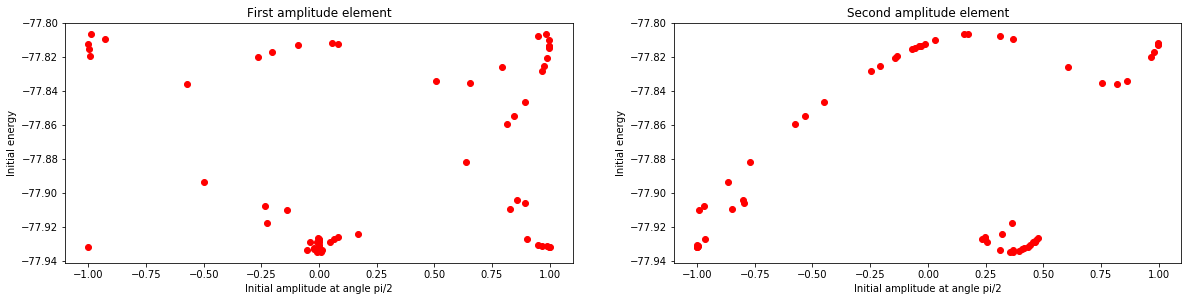

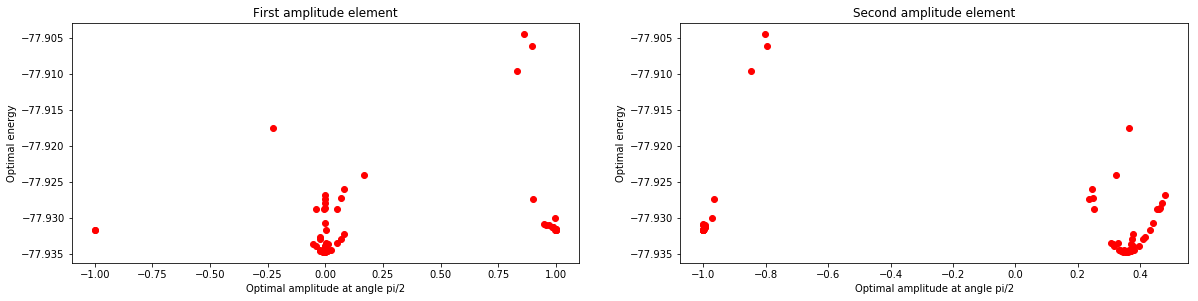

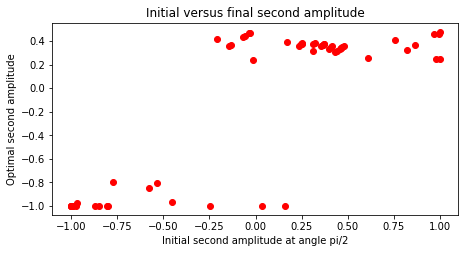

In [12]:
display_data("imfil\imfil_1.57rad_out_0_noise.csv")

Text(0,0.5,'Average distance')

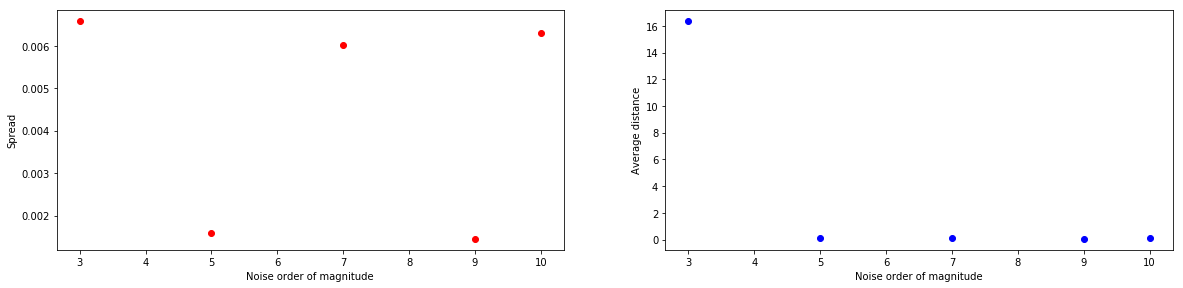

In [14]:
noise = np.array([3,5,7,9,10])
spread = np.array([0.00659129612921673, 
                   0.0015794406993480654, 
                   0.00602712490386327,
                   0.0014497003190867151,
                  0.006309683476460301])
dist = np.array([16.37987058159062, 
                 0.07951356769121452, 
                 0.1392999801696126,
                 0.04916496088138835,
                 0.1391291341489896])


fig = pylab.figure(figsize=(20,15))
pylab.subplot(3,2,1)
#     pylab.xlim([-.00018, .00018])
pylab.plot(noise, spread, 'ro')
pylab.xlabel("Noise order of magnitude")
pylab.ylabel("Spread")
# pylab.title("First amplitude element")

pylab.subplot(3,2,2)
pylab.plot(noise, dist, 'bo')
pylab.xlabel("Noise order of magnitude")
pylab.ylabel("Average distance")
# pylab.title("Second amplitude element")


Index([u'initamp1', u'initamp2', u'finalamp1', u'finalamp2', u'finalenergy',
       u'Unnamed: 5'],
      dtype='object')
('av_dist:', 0.05564618576312239)
('spread:', 0.0018380090974180962)
0    -77.930581
1    -77.931657
2    -77.931657
3    -77.931538
4    -77.931538
5    -77.931538
6    -77.928081
7    -77.934614
8    -77.934614
9    -77.934605
10   -77.934605
11   -77.934605
12   -77.934476
13   -77.934476
14   -77.934476
15   -77.934013
16   -77.934683
17   -77.934683
18   -77.931457
19   -77.931695
20   -77.931695
21   -77.931706
22   -77.931706
23   -77.931706
24   -77.930833
25   -77.931394
26   -77.931647
27   -77.928815
28   -77.933610
29   -77.934630
Name: finalenergy, dtype: float64


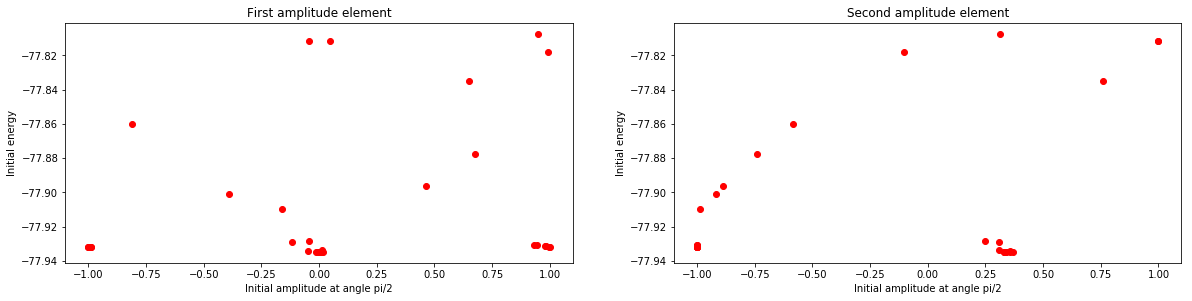

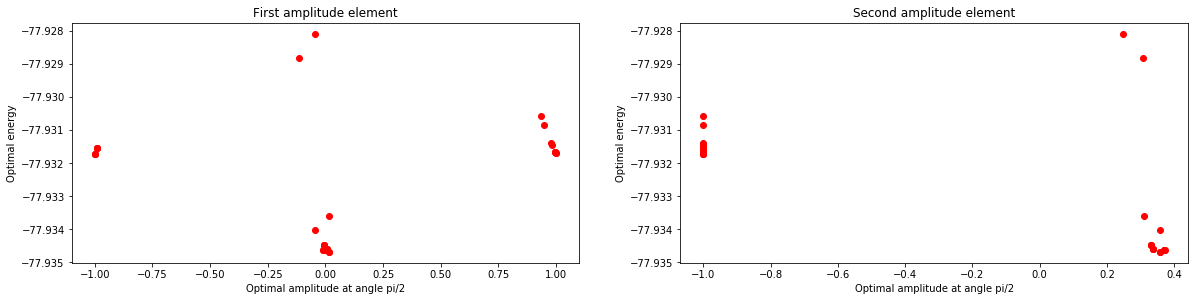

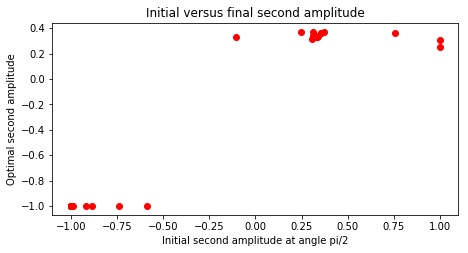

In [16]:
display_data("imfil\imfil_1.57rad_out_0_noise_mod.csv")